In [2]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import pandas as pd
import pickle as pkl
import sklearn.model_selection
import models
import util
import os
import config
import viz
import scipy.stats
from tqdm import tqdm
import figs
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
CELEB_IMS_DIR = '../data/celeba-hq/ims/'
CELEB_ANNO_DIR = '../data/celeba-hq/Anno/'
os.listdir(CELEB_IMS_DIR)

In [20]:
ids_orig = pd.read_csv(oj(CELEB_ANNO_DIR, 'identity_CelebA.txt'), delim_whitespace=True, header=None)
ids_orig = ids.rename(columns={0: 'orig_file', 1: 'id'})
remap = pd.read_csv('../data/celeba-hq/mapping.txt', delim_whitespace=True)

In [22]:
(vals, counts) = np.unique(ids_orig.id.values, return_counts=True)

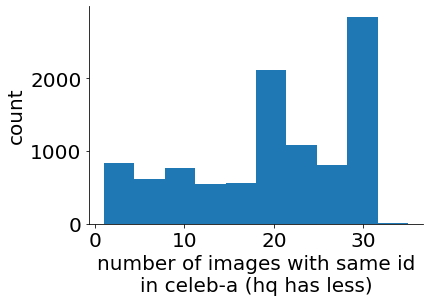

In [23]:
plt.hist(counts)
plt.xlabel('number of images with same id\nin celeb-a (hq has less)')
plt.ylabel('count')
plt.show()

**after remapping**

In [25]:
ids = remap.merge(ids_orig, on='orig_file', how='left')

In [33]:
x = ids[ids.id == 14]

In [34]:
x

,idx,orig_idx,orig_file,proc_md5,final_md5,id
3262,3262,41292,041293.jpg,35a50e7b68e03212ed3ccd4b3c187b9f,9886a0721e8e3e5b6a43d6f268703c10,14
8873,8873,139080,139081.jpg,8b345c0ff52f44030836d3a14e48999c,7d66bbba44bfa42191cb07a55ac6a302,14
9709,9709,69881,069882.jpg,2bb65b0b02d9f4649ff53dad3ab059e6,542080791c0773ab45bbaa2a25cdac46,14
16204,16204,44191,044192.jpg,d8e3e5280613dcab5f62b078b5a1c488,93539bd690bf33ea201285838afef514,14
17059,17059,158476,158477.jpg,73e50819ccd8da5428c59eda298e4ffd,077f821a7cb43515fa31376272269448,14
18952,18952,55898,055899.jpg,ec691db91cde98096b567f710fcb8e0f,18dd65f9518e87ac09e202ec8ff12a9c,14
20507,20507,65273,065274.jpg,f8d26bd19c3399660959e856a366d826,cad72cfbe10e4afadfdcac675ab9de06,14
23658,23658,122059,122060.jpg,489d5c379864441d333b62ceb1678612,1ca4dcaac62dc2b23ba01ad9fca2b875,14
25741,25741,62160,062161.jpg,6873dfa1dfc6f76129a54e4eb140a8c5,74097e02c8269c6ded082f5c2aba5386,14
26267,26267,85652,085653.jpg,5e309fef0b96ec0b9adc0b8dae640726,51008d15b29fabc9562caedeb7933aa1,14


In [40]:
fnames = sorted([f for f in os.listdir(oj(CELEB_IMS_DIR)) if '.jpg' in f])

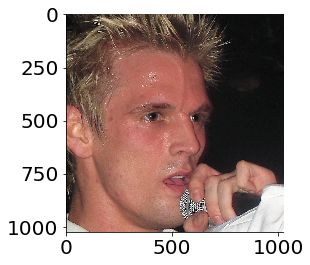

In [43]:
im = mpimg.imread(oj(CELEB_IMS_DIR, fnames[3262]))
plt.imshow(im)

im = mpimg.imread(oj(CELEB_IMS_DIR, fnames[3262]))
plt.imshow(im)

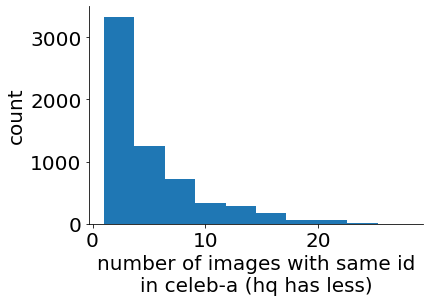

In [30]:
(vals, counts) = np.unique(ids.id.values, return_counts=True)
plt.hist(counts)
plt.xlabel('number of images with same id\nin celeb-a (hq has less)')
plt.ylabel('count')
plt.show()

In [31]:
d = {v: c for (v, c) in zip(vals, counts)}

In [32]:
d

{1: 1,
 6: 4,
 7: 1,
 8: 9,
 9: 1,
 12: 4,
 14: 11,
 15: 13,
 16: 1,
 17: 11,
 18: 2,
 19: 1,
 21: 9,
 22: 17,
 23: 7,
 25: 3,
 26: 1,
 27: 6,
 31: 7,
 32: 17,
 33: 2,
 34: 15,
 35: 4,
 38: 14,
 39: 1,
 40: 2,
 43: 1,
 44: 1,
 45: 4,
 46: 5,
 47: 11,
 48: 1,
 49: 3,
 51: 2,
 52: 4,
 53: 4,
 54: 2,
 55: 3,
 56: 10,
 57: 3,
 58: 1,
 59: 17,
 60: 2,
 61: 16,
 62: 2,
 64: 5,
 65: 11,
 66: 11,
 67: 1,
 69: 17,
 70: 9,
 73: 5,
 74: 1,
 77: 2,
 78: 15,
 79: 3,
 80: 3,
 81: 24,
 82: 5,
 84: 2,
 85: 12,
 87: 7,
 89: 18,
 92: 1,
 93: 2,
 94: 20,
 95: 8,
 96: 10,
 98: 1,
 99: 2,
 100: 2,
 101: 5,
 103: 1,
 104: 6,
 105: 4,
 106: 13,
 107: 2,
 108: 1,
 113: 4,
 114: 15,
 116: 2,
 117: 1,
 118: 3,
 119: 1,
 121: 22,
 122: 4,
 123: 2,
 124: 5,
 125: 7,
 126: 9,
 127: 1,
 129: 5,
 130: 9,
 132: 10,
 133: 11,
 135: 3,
 136: 1,
 137: 1,
 138: 19,
 139: 10,
 140: 2,
 142: 11,
 143: 4,
 144: 1,
 145: 7,
 146: 5,
 147: 5,
 148: 4,
 151: 6,
 153: 13,
 155: 14,
 156: 2,
 157: 7,
 158: 3,
 159: 2,
 160: 19,
